Implement an unsharp masking operation (http://en.wikipedia.org/wiki/Unsharp_masking) by blurring an image and then subtracting the blurred version from the original. This gives a sharpening effect to the image. Try this on both color and grayscale images.

In [12]:
%matplotlib inline
from PIL import Image
from pylab import *
from numpy import *
from scipy.ndimage import filters

def display_figure(im, figure_title, is_gray=False):
    figure()
    if is_gray:
        gray()
    imshow(im)
    axis('equal')
    axis('off')
    title(figure_title)

def unsharp_masking(im, radius=3.0, amount=0.25, is_gray=False):
    if is_gray:
        blurred_im = filters.gaussian_filter(im, sigma=radius)
    
    else: 
        blurred_im = zeros(im.shape)
        for i in range(3):
            blurred_im[:,:,i] = filters.gaussian_filter(im[:,:,i], sigma=radius)
        blurred_im = uint8(blurred_im)
        
    return im - blurred_im * amount

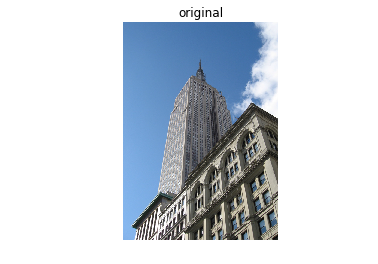

In [39]:
im_color = array(Image.open('../images/empire.jpg'))
display_figure(im_color, 'original')

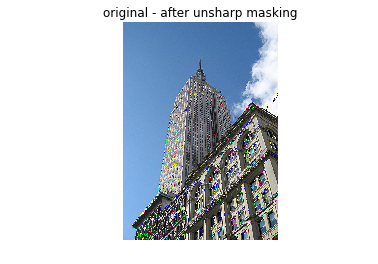

In [40]:
im_color2 = unsharp_masking(im_color, radius=2, amount=1, is_gray=False)
display_figure(im_color2, 'original - after unsharp masking')

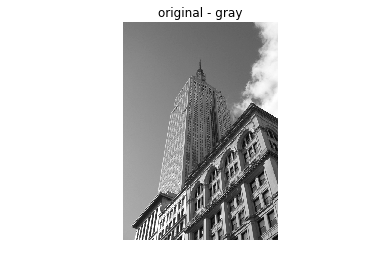

In [36]:
gray()
im_gray = array(Image.open('../images/empire.jpg').convert('L'))
display_figure(im_gray, 'original - gray', is_gray=True)

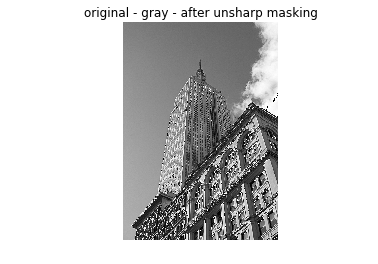

In [38]:
im_gray2 = unsharp_masking(im_gray, radius=2, amount=1, is_gray=True)
display_figure(im_gray2, 'original - gray - after unsharp masking', is_gray=True)